In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Loading The DataSet


In [3]:
df = pd.read_csv("D:\Data\CarPrice_Assignment.csv")

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
df.shape

(205, 26)

# Preprocessing the Car Prices Dataset

In [9]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# Renaming Columns in the DataFrame for Better Readability

In [11]:
df.rename(columns={
    'CarName': 'car_name','fueltype': 'fuel_type','doornumber': 'door_number','carbody': 'car_body','drivewheel': 'drive_wheel',
    'enginelocation': 'engine_location','wheelbase': 'wheel_base','carlength': 'car_length','carwidth': 'car_width','carheight': 'car_height','curbweight': 'curb_weight',
    'enginetype': 'engine_type','cylindernumber': 'cylinder_number','enginesize': 'engine_size','fuelsystem': 'fuel_system','boreratio': 'bore_ratio',
    'compressionratio': 'compression_ratio','peakrpm': 'peak_rpm','citympg': 'city_mpg','highwaympg': 'highway_mpg'}, inplace=True)

In [12]:
df.duplicated().sum()

0

# Calculating Correlation Matrix for Numerical Features

In [13]:
numerical = df.select_dtypes(include=['float64','int64'])
corr = numerical.corr()

print(corr)

                     car_ID  symboling  wheel_base  car_length  car_width  \
car_ID             1.000000  -0.151621    0.129729    0.170636   0.052387   
symboling         -0.151621   1.000000   -0.531954   -0.357612  -0.232919   
wheel_base         0.129729  -0.531954    1.000000    0.874587   0.795144   
car_length         0.170636  -0.357612    0.874587    1.000000   0.841118   
car_width          0.052387  -0.232919    0.795144    0.841118   1.000000   
car_height         0.255960  -0.541038    0.589435    0.491029   0.279210   
curb_weight        0.071962  -0.227691    0.776386    0.877728   0.867032   
engine_size       -0.033930  -0.105790    0.569329    0.683360   0.735433   
bore_ratio         0.260064  -0.130051    0.488750    0.606454   0.559150   
stroke            -0.160824  -0.008735    0.160959    0.129533   0.182942   
compression_ratio  0.150276  -0.178515    0.249786    0.158414   0.181129   
horsepower        -0.015006   0.070873    0.353294    0.552623   0.640732   

# Boxplot Visualization of Numerical Variables

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'car_ID'),
  Text(1, 0, 'symboling'),
  Text(2, 0, 'wheel_base'),
  Text(3, 0, 'car_length'),
  Text(4, 0, 'car_width'),
  Text(5, 0, 'car_height'),
  Text(6, 0, 'curb_weight'),
  Text(7, 0, 'engine_size'),
  Text(8, 0, 'bore_ratio'),
  Text(9, 0, 'stroke'),
  Text(10, 0, 'compression_ratio'),
  Text(11, 0, 'horsepower'),
  Text(12, 0, 'peak_rpm'),
  Text(13, 0, 'city_mpg'),
  Text(14, 0, 'highway_mpg'),
  Text(15, 0, 'price')])

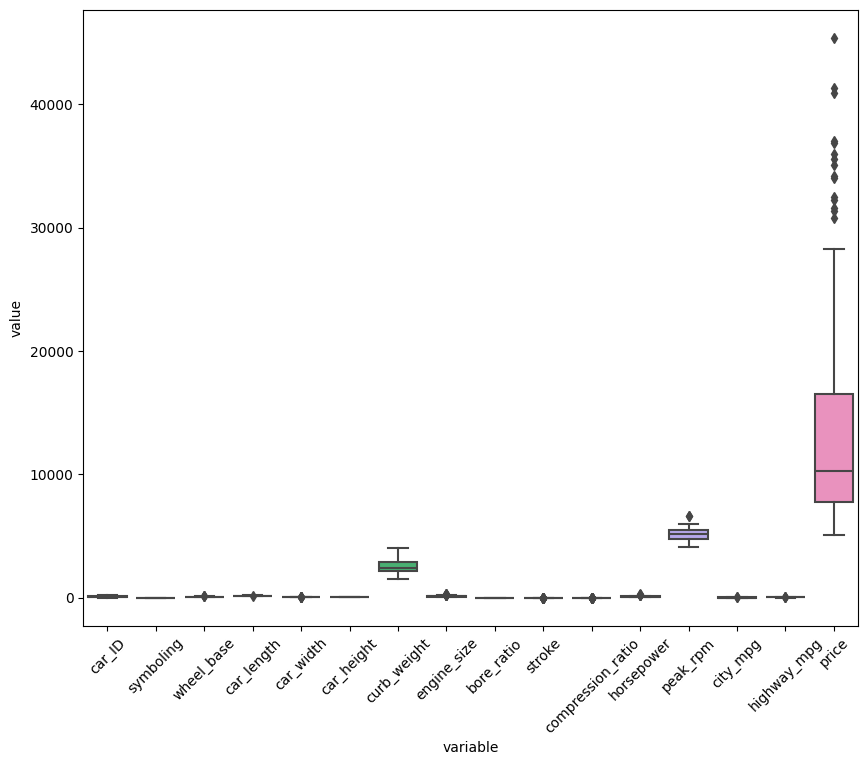

In [14]:
melt_df = df.melt(value_vars=df.select_dtypes(['float64','int64']))

plt.figure(figsize=(10,8))
sns.boxplot(x="variable",y="value",data=melt_df)
plt.xticks(rotation=45)

After generating the boxplot visualization for numerical variables, it was observed that there are outliers present in the price and peak_rpm columns. Outliers can significantly influence statistical analyses and model performance, potentially skewing results. Identifying these outliers is crucial for making informed decisions on whether to retain, transform, or remove them from the dataset. The presence of outliers in the price column may indicate extreme values that could affect pricing models, while outliers in the peak_rpm column may suggest anomalies in engine performance data. Further investigation into these outliers will help determine their impact on the analysis and guide appropriate preprocessing steps.

# Outlier Detection in Price and Peak RPM Columns

<Axes: xlabel='peak_rpm'>

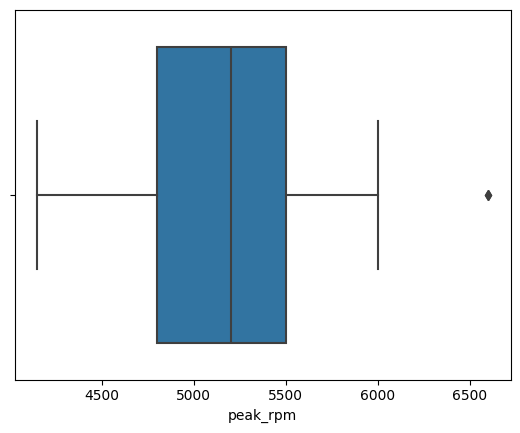

In [15]:
sns.boxplot(x=df['peak_rpm'],data=df)

<Axes: xlabel='price'>

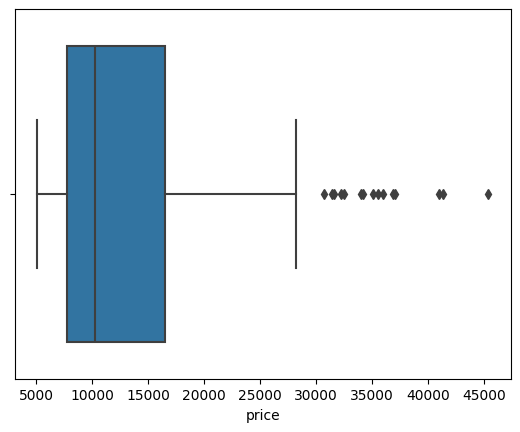

In [16]:
sns.boxplot(x=df['price'],data=df)

# Calculating Outlier Limits for Price Column Using Z-Score Method

In [17]:
upper_limt1 = df['price'].mean() + 3 * df['price'].std()
lower_limt1 = df['price'].mean() - 3 * df['price'].std()

print("uppper_limit :",upper_limt1)
print("lower_limt:",lower_limt1)

uppper_limit : 37243.267565961156
lower_limt: -10689.846424497744


In [18]:
df.loc[(df['price']>upper_limt1) | (df['price']<lower_limt1)]

,car_ID,symboling,car_name,fuel_type,aspiration,door_number,car_body,drive_wheel,engine_location,wheel_base,...,engine_size,fuel_system,bore_ratio,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
16,17,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
73,74,0,buick century special,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0


# Calculating Outlier Limits for Peak RPM Column Using Z-Score Method

In [19]:
upper_limt2 = df['peak_rpm'].mean() + 3 * df['peak_rpm'].std()
lower_limt2 = df['peak_rpm'].mean() - 3 * df['peak_rpm'].std()

print("uppper_limit :",upper_limt2)
print("lower_limt:",lower_limt2)

uppper_limit : 6556.0788803903515
lower_limt: 3694.1650220486727


In [20]:
df.loc[(df['peak_rpm']>upper_limt2) | (df['peak_rpm']<lower_limt2)]

,car_ID,symboling,car_name,fuel_type,aspiration,door_number,car_body,drive_wheel,engine_location,wheel_base,...,engine_size,fuel_system,bore_ratio,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
165,166,1,toyota celica gt liftback,gas,std,two,sedan,rwd,front,94.5,...,98,mpfi,3.24,3.08,9.4,112,6600,26,29,9298.0
166,167,1,toyota corolla tercel,gas,std,two,hatchback,rwd,front,94.5,...,98,mpfi,3.24,3.08,9.4,112,6600,26,29,9538.0


In [21]:
new_df = df.copy()

# Capping Outliers in Price Column Using Z-Score Method

In [22]:
new_df = new_df.loc[(df['price']<upper_limt1) & (df['price']>lower_limt1)]

# Capping Outliers in Peak rpm Column Using Z-Score Method

In [41]:
new_df = new_df.loc[(df['peak_rpm']<upper_limt2) & (df['peak_rpm']>lower_limt2)]

# After Capping

<Axes: xlabel='peak_rpm'>

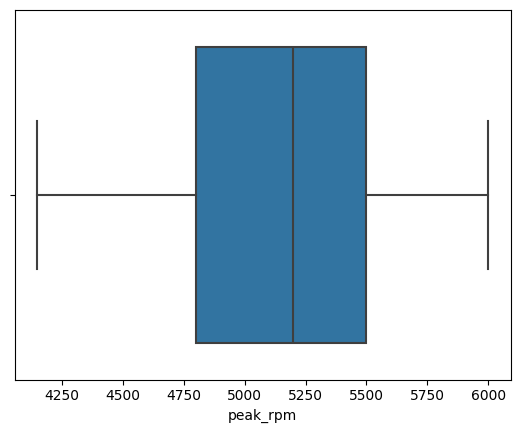

In [24]:
sns.boxplot(x=new_df['peak_rpm'],data=new_df)

<Axes: xlabel='price'>

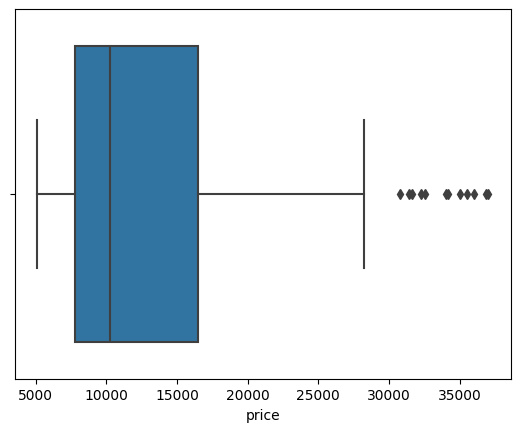

In [25]:
sns.boxplot(x=new_df['price'],data=new_df)

In [26]:
new_df.columns.astype(str)

Index(['car_ID', 'symboling', 'car_name', 'fuel_type', 'aspiration',
       'door_number', 'car_body', 'drive_wheel', 'engine_location',
       'wheel_base', 'car_length', 'car_width', 'car_height', 'curb_weight',
       'engine_type', 'cylinder_number', 'engine_size', 'fuel_system',
       'bore_ratio', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm',
       'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

# Identifying Categorical Columns in the DataFrame

In [27]:
string_columns = df.select_dtypes(include=['object']).columns

for col in string_columns:
    print(col)

car_name
fuel_type
aspiration
door_number
car_body
drive_wheel
engine_location
engine_type
cylinder_number
fuel_system


In [28]:
columns = ['car_name', 'fuel_type', 'aspiration', 'door_number', 'car_body',
           'drive_wheel', 'engine_location', 'engine_type', 'cylinder_number', 'fuel_system']


# Label Encoding of Categorical Columns

In [29]:
label_en = LabelEncoder()

for column in columns:
    new_df[column] = label_en.fit_transform(new_df[column])
    
new_df.head()

,car_ID,symboling,car_name,fuel_type,aspiration,door_number,car_body,drive_wheel,engine_location,wheel_base,...,engine_size,fuel_system,bore_ratio,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


This code snippet applies label encoding to the specified categorical columns in the DataFrame new_df using the LabelEncoder from scikit-learn. The LabelEncoder converts each unique category in the selected columns into a numerical format, assigning an integer value to each category. The transformed columns replace the original categorical columns in new_df. The result is displayed using the head() method, which shows the first few rows of the modified DataFrame, making it easier to verify the changes and check the encoded values.

In [30]:
new_df.shape

(200, 26)

# Defining Features and Target Variable

In [31]:
x = new_df.drop(columns=['price'])
y = new_df['price']

# Splitting the Dataset into Training and Testing Sets

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Model Initialization for Regression Algorithms

In [33]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR()
}

models is created to initialize five different regression algorithms. Each key in the dictionary corresponds to a model name, while the values are the respective model instances from sklearn

# Model Performance Evaluation

In [34]:
performance = pd.DataFrame(columns=['Model', 'R-squared', 'MSE', 'MAE'])

for model_name,model in models.items():
    model.fit(x_train,y_train)
    
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    
    new_row = pd.DataFrame({
        'Model': [model_name],
        'R-squared': [r2],
        'MSE': [mse],
        'MAE': [mae]
    })
    
    performance = pd.concat([performance,new_row],ignore_index=True)
    
print(performance)

                         Model  R-squared           MSE          MAE
0            Linear Regression   0.883278  1.023477e+07  2267.107775
1      Decision Tree Regressor   0.907797  8.084797e+06  1966.779175
2      Random Forest Regressor   0.851393  1.303065e+07  2229.781825
3  Gradient Boosting Regressor   0.918129  7.178890e+06  1778.220701
4     Support Vector Regressor  -0.169817  1.025755e+08  6506.087393


This code evaluates the performance of various regression models on the test dataset. It initializes a DataFrame named performance to store the results of each model's performance metrics, including R-squared, Mean Squared Error (MSE), and Mean Absolute Error (MAE).

# Identifying the Best Performing Model

In [35]:
best_r2_model = performance.loc[performance['R-squared'].idxmax()]
best_mse_model = performance.loc[performance['MSE'].idxmin()]
best_mae_model = performance.loc[performance['MAE'].idxmin()]

print("Best model based on R-squared:", best_r2_model)
print("Best model based on MSE:", best_mse_model)
print("Best model based on MAE:", best_mae_model)

Best model based on R-squared: Model        Gradient Boosting Regressor
R-squared                       0.918129
MSE                       7178890.243182
MAE                          1778.220701
Name: 3, dtype: object
Best model based on MSE: Model        Gradient Boosting Regressor
R-squared                       0.918129
MSE                       7178890.243182
MAE                          1778.220701
Name: 3, dtype: object
Best model based on MAE: Model        Gradient Boosting Regressor
R-squared                       0.918129
MSE                       7178890.243182
MAE                          1778.220701
Name: 3, dtype: object


The evaluation of the regression models reveals that the Gradient Boosting Regressor is the best-performing model across all metrics, including R-squared, Mean Squared Error (MSE), and Mean Absolute Error (MAE). With an R-squared value of 0.918129, the model explains approximately 91.81% of the variance in car prices, indicating its strong predictive capability. Additionally, it has the lowest MSE of 7178890.243182, which reflects the average squared difference between predicted and actual prices, and an MAE of 1778.220701, representing the average absolute difference between predicted and actual values. These results suggest that the Gradient Boosting Regressor is the most reliable model for accurately estimating car prices in this dataset, outperforming the other regression algorithms considered.

# Gradient Boosting Regressor Feature Importance

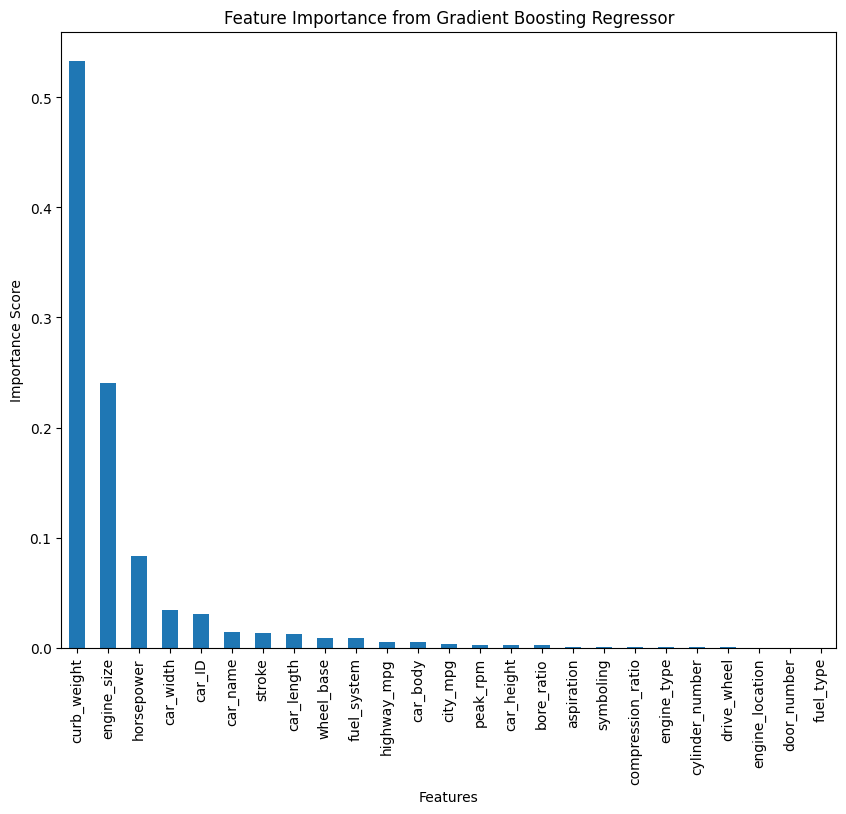

In [42]:
gbr_model = GradientBoostingRegressor()
gbr_model.fit(x_train, y_train)

feature_importance = pd.Series(gbr_model.feature_importances_, index=x_train.columns)

plt.figure(figsize=(10, 8))
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance from Gradient Boosting Regressor')

In the feature selection analysis, curb weight, engine size, and horsepower were identified as the most significant variables affecting car prices. Curb weight, which measures the weight of the vehicle without any cargo or passengers, often indicates a more robust build, enhancing safety and stability, which can appeal to consumers and drive up prices. Engine size, typically measured in liters, is associated with better performance and power; larger engines often attract buyers seeking enhanced driving experiences. Horsepower, reflecting the engine's power output, also plays a crucial role, as higher horsepower values are linked to improved performance capabilities, such as faster speeds and greater towing capacity. Together, these features significantly influence the perceived quality and desirability of vehicles, making them valuable predictors of car prices in the automotive market.

# Hyperparameter Grid for Gradient Boosting Regressor

In [37]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

# Hyperparameter Tuning for Gradient Boosting Regressor Using Grid Search 

In [40]:
Gradient = GradientBoostingRegressor()

grid_search = GridSearchCV(estimator=Gradient, param_grid=param_grid,
                           scoring='neg_mean_squared_error', 
                           cv=5, n_jobs=-1, verbose=2)

grid_search.fit(x_train,y_train)

best_param = grid_search.best_params_

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Print performance metrics
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R-squared: ", r2_score(y_test, y_pred))

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Mean Squared Error:  8264751.21081146
R-squared:  0.9057450748070329


After hyperparameter tuning, the MSE increased to 8,264,751.21081146, and the R-squared decreased to 0.905745. So, the tuning negatively affected the model's performance compared to before.